In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Fase 1 - Comprensi칩n del negocio

En esta fase se identificar치n los factores clave necesarios para abordar los objetivos empresariales y se plantear치n en objetivos espec칤ficos de miner칤a de datos, asegurando que el an치lisis posterior responda adecuadamente a las necesidades del negocio.

## Proyecto de Deep Learning - Dataset CIFAR-100

**Autores:** Daniel Iturra, Diego Velasquez, Jonathan Huala, Jorge Gonzales.

**Fecha:** 20-04-2025

# Fase 2 - Comprensi칩n de los datos

Durante esta fase, se realizar치 una recolecci칩n y an치lisis preliminar de los datos disponibles, con el objetivo de comprender su naturaleza y calidad. Se identificar치n patrones iniciales y posibles problemas que puedan afectar el an치lisis, lo que permitir치 guiar el proceso de preparaci칩n de los datos.

## Exploraciones iniciales

Configuraci칩n de estilos para que las gr치ficas se van m치s limpias.

In [34]:
plt.style.use('ggplot')
sns.set()

Se cargan los datos de CIFAR-100 usando la funci칩n load_data() con label_mode='fine', lo cual significa que se usaron las 100 clases espec칤ficas del dataset.

In [35]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Se revisan las dimensiones de los datos y las etiquetas.

In [36]:
print("Dimensiones del set de entrenamiento:", x_train.shape)
print("Dimensiones del set de prueba:", x_test.shape)

num_classes = len(np.unique(y_train))
print("N칰mero de clases:", num_classes)

print("Primeras 10 etiquetas (y_train):", y_train[:10].ravel())
print("Etiquetas 칰nicas:", np.unique(y_train))

Dimensiones del set de entrenamiento: (50000, 32, 32, 3)
Dimensiones del set de prueba: (10000, 32, 32, 3)
N칰mero de clases: 100
Primeras 10 etiquetas (y_train): [19 29  0 11  1 86 90 28 23 31]
Etiquetas 칰nicas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Se define la lista de nombres humanos de las etiquetas, asociadas a cada n칰mero (del 0 al 99).

In [37]:
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

Se seleccionan 10 im치genes aleatorias y se muestran junto a su nombre.

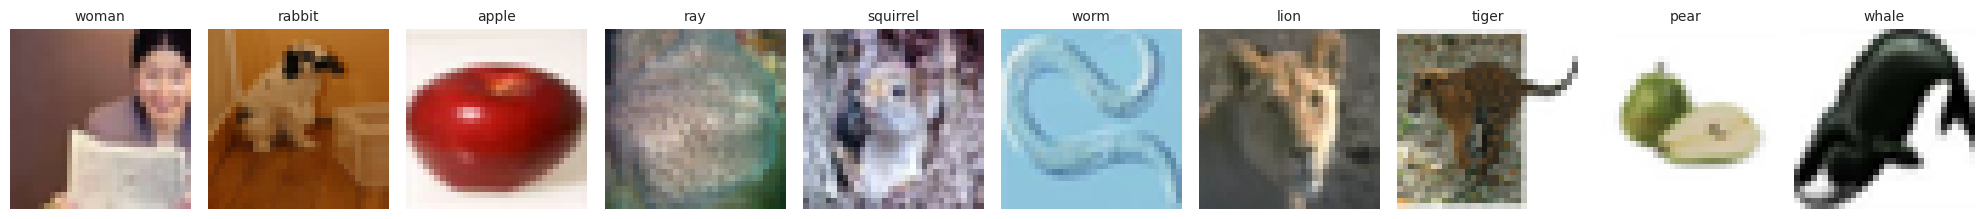

In [38]:
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    index = random.randint(0, len(x_train) - 1)
    axes[i].imshow(x_train[index])
    label = y_train[index][0]
    axes[i].set_title(fine_labels[label], fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Se cuentan cu치ntas im치genes hay por clase y se construy칩 un dataframe con esa informaci칩n.

In [39]:
unique, counts = np.unique(y_train, return_counts=True)

df_counts = pd.DataFrame({
    'Label ID': unique,
    'Label Name': [fine_labels[i] for i in unique],
    'Count': counts
})

df_counts_sorted = df_counts.sort_values(by='Count', ascending=False)
df_counts_sorted.head()

Label ID Label Name  Count
0          0      apple    500
63        63  porcupine    500
73        73      shark    500
72        72       seal    500
71        71        sea    500

Se grafica un barplot de las clases m치s comunes.

/tmp/ipykernel_23/237555424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')


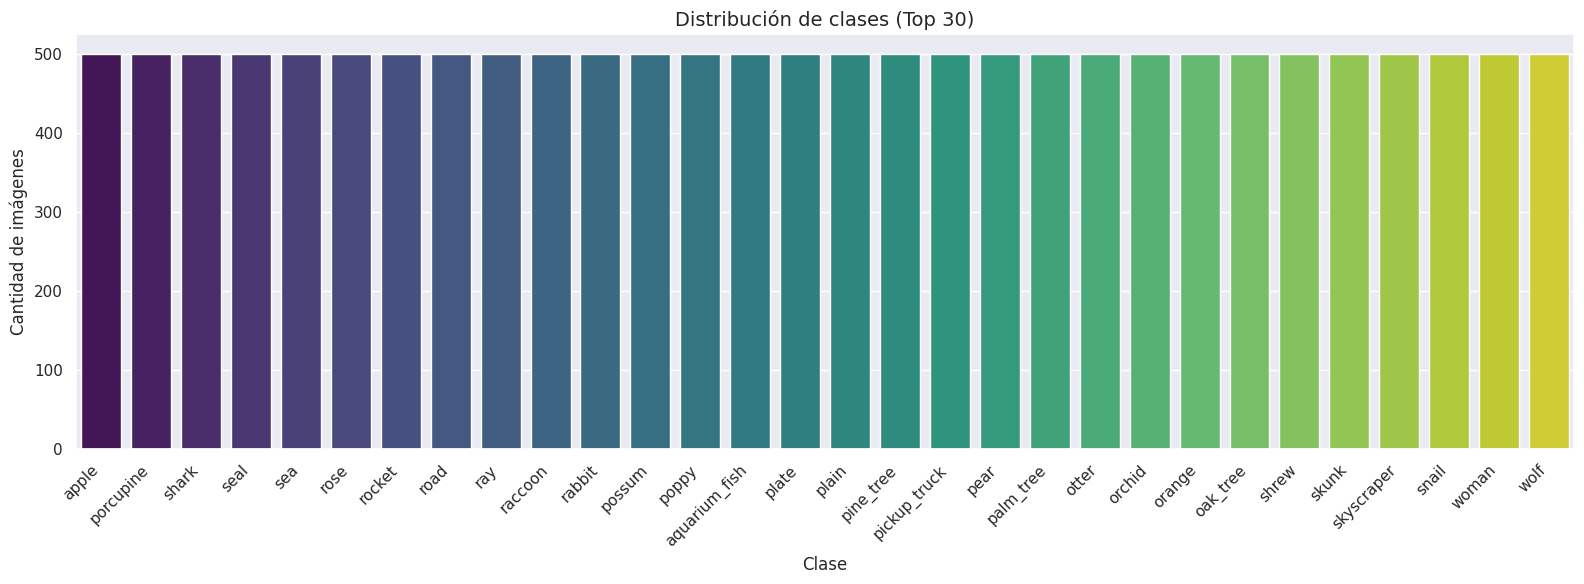

In [40]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')
plt.title('Distribuci칩n de clases (Top 30)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de im치genes')
plt.xlabel('Clase')
plt.tight_layout()
plt.show()

Se pasar치 a la preparaci칩n de los datos para ocuparlos en las redes neuronales para las clases [Preparaci칩n para la red de las clases] [Fase 3] 

## Carga de im치genes y etiquetas de las superclases

Se cargar las im치genes y etiquetas de CIFAR-100, usando las superclases (20 clases).

In [52]:
(x_train_sc, y_train_sc), (x_test_sc, y_test_sc) = cifar100.load_data(label_mode='coarse')

Se pasar치 a la preparaci칩n de los datos para ocuparlos en las redes neuronales para las superclases [Preparaci칩n para la red de las superclases] [Fase 3] 

# Fase 3 - Preparaci칩n de los datos

En esta fase se seleccionar치n, limpiar치n y transformar치n los datos para que sean adecuados al modelado. Se abordar치n problemas como valores faltantes, duplicados o inconsistencias, y se construir치n nuevas variables cuando sea necesario, con el objetivo de obtener un conjunto de datos listo para aplicar las t칠cnicas de modelado.

## Preparaci칩n para la red de las clases

Las im치genes son normalizadas (sus valores pasan de 0-255 a 0-1) para que la red neuronal pueda aprender de forma m치s eficiente.

In [41]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Las etiquetas se convierten a one-hot encoding para que la red pueda trabajar con ellas correctamente en la salida softmax.

In [42]:
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

Se crea un generador que aumenta artificialmente el tama침o del dataset y se divide 'x_train' en 80% para entrenamiento y 20% para validaci칩n con 'validation_split'.

In [43]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow(x_train, y_train_cat, batch_size=32, subset='training')
val_generator = datagen.flow(x_train, y_train_cat, batch_size=32, subset='validation')

Se pasa al modelado [Modelado de las redes neuronales para las clases] [Fase 4]

## Preparaci칩n para la red de las superclases

Se normalizan las im치genes en valores de p칤xeles de rango [0,1]

In [53]:
x_train_sc = x_train_sc.astype('float32') / 255.0
x_test_sc = x_test_sc.astype('float32') / 255.0

Se realiza la conversi칩n de etiquetas a codificaci칩n one-hot.

In [54]:
y_train_cat_sc = to_categorical(y_train_sc, 20)
y_test_cat_sc = to_categorical(y_test_sc, 20)

Se crea el generador de im치genes con transformaciones aleatorias para fortalecer el entrenamiento y validaci칩n.

In [55]:
datagen_sc = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator_sc = datagen.flow(x_train_sc, y_train_cat_sc, batch_size=32, subset='training')
val_generator_sc = datagen.flow(x_train_sc, y_train_cat_sc, batch_size=32, subset='validation')

Se pasa al modelado [Modelado de las redes neuronales para las superclases] [Fase 4]

# Fase 4 - Modelado

En esta fase se seleccionar치n los algoritmos de modelado m치s adecuados y se entrenar치n los modelos utilizando el conjunto de datos preparado. Se ajustar치n los par치metros de los modelos y se evaluar치n los resultados preliminares para determinar qu칠 t칠cnicas ofrecen el mejor desempe침o para cumplir con los objetivos planteados.

## Modelado de las redes neuronales para las clases

Se construye una Red Convolucional Profunda utilizando Inception Blocks, Batch Normalization y Dropout para mejorar la estabilidad, la capacidad de generalizaci칩n y evitar el sobreajuste en los datos.

In [44]:
def inception_block(x, filters):
    f1, f3, f5 = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path1 = layers.LeakyReLU(alpha=0.1)(path1)

    path2 = layers.Conv2D(f3, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path2 = layers.LeakyReLU(alpha=0.1)(path2)
    path2 = layers.Conv2D(f3, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path2)
    path2 = layers.LeakyReLU(alpha=0.1)(path2)

    path3 = layers.Conv2D(f5, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path3 = layers.LeakyReLU(alpha=0.1)(path3)
    path3 = layers.Conv2D(f5, (5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path3)
    path3 = layers.LeakyReLU(alpha=0.1)(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(f1, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path4)
    path4 = layers.LeakyReLU(alpha=0.1)(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(input_layer)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = inception_block(x, filters=(64, 96, 128))
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = inception_block(x, filters=(64, 96, 128))
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

x = layers.GlobalAveragePooling2D()(x)  # Paso 5
x = layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output)

Se usa SGD con momentum y nesterov, lo cual es un optimizador cl치sico pero muy eficaz, al igual que se agreg칩 un callback para guardar autom치ticamente la mejor versi칩n del modelo durante el entrenamiento.

In [45]:
checkpoint_cb = ModelCheckpoint(
    filepath='checkpoints/cnn_cifar100_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

optimizer = SGD(learning_rate=1e-2, momentum=0.9, nesterov=True)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Se configura el earlyStopping, el cual detiene el entrenamiento cuando la validaci칩n no mejora en 5 칠pocas seguidas, luego se configura ReduceLROnPlateau, el cual reduce la tasa de aprendizaje si la validaci칩n se estanca.

In [46]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

Se entrena el modelo con aumento de datos en cada lote, se le coloca validaci칩n autom치tica, se implementa el guardado del mejor checkpoint, se le coloca la detenci칩n temprana si no mejora el modelo y se ajusta autom치ticamente el learning rate.

In [47]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint_cb, reduce_lr],
    verbose=1
)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 4.6315 - accuracy: 0.0474
Epoch 1: val_accuracy improved from -inf to 0.07190, saving model to checkpoints/cnn_cifar100_best.h5


/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 186s 147ms/step - loss: 4.6315 - accuracy: 0.0474 - val_loss: 4.1910 - val_accuracy: 0.0719 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 4.1004 - accuracy: 0.0862
Epoch 2: val_accuracy improved from 0.07190 to 0.07900, saving model to checkpoints/cnn_cifar100_best.h5
1250/1250 [==============================] - 180s 144ms/step - loss: 4.1004 - accuracy: 0.0862 - val_loss: 4.2026 - val_accuracy: 0.0790 - lr: 0.0100
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 3.8937 - accuracy: 0.1146
Epoch 3: val_accuracy improved from 0.07900 to 0.11800, saving model to checkpoints/cnn_cifar100_best.h5
1250/1250 [==============================] - 180s 144ms/step - loss: 3.8937 - accuracy: 0.1146 - val_loss: 3.9214 - val_accuracy: 0.1180 - lr: 0.0100
Epoch 4/100
1250/1250 [==============================] - ETA: 0s - loss: 3.7671 - accuracy: 0.1353
Epoch 4: val_accuracy did not improve from 

Se pasa a la evaluaci칩n [Evaluaci칩n de las redes neuronales para las clases] [Fase 5]

## Modelado de las redes neuronales para las superclases

Se construye una Red Convolucional Profunda utilizando Inception Blocks, Batch Normalization y Dropout para mejorar la estabilidad, la capacidad de generalizaci칩n y evitar el sobreajuste en los datos.

In [61]:
def inception_block_sc(x, filters):
    f1, f3, f5 = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path1 = layers.LeakyReLU(alpha=0.1)(path1)

    path2 = layers.Conv2D(f3, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path2 = layers.LeakyReLU(alpha=0.1)(path2)
    path2 = layers.Conv2D(f3, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path2)
    path2 = layers.LeakyReLU(alpha=0.1)(path2)

    path3 = layers.Conv2D(f5, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    path3 = layers.LeakyReLU(alpha=0.1)(path3)
    path3 = layers.Conv2D(f5, (5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path3)
    path3 = layers.LeakyReLU(alpha=0.1)(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(f1, (1, 1), padding='same', kernel_regularizer=regularizers.l2(1e-4))(path4)
    path4 = layers.LeakyReLU(alpha=0.1)(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

input_layer_sc = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(input_layer_sc)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = inception_block_sc(x, filters=(64, 96, 128))
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = inception_block_sc(x, filters=(64, 96, 128))
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

output_sc = layers.Dense(20, activation='softmax')(x)

model_sc = models.Model(inputs=input_layer_sc, outputs=output_sc)

Definici칩n de las funciones clave que controlar치n el aprendizaje y la estabilidad del modelo como SGD con Nesterov Momentum para una convergencia m치s r치pida y precisa, EarlyStopping para detener el entrenamiento cuando la validaci칩n deja de mejorar, evitando el sobreentrenamiento, ModelCheckpoint para guardar autom치ticamente el mejor modelo durante el entrenamiento y ReduceLROnPlateau para ajustar din치micamente la tasa de aprendizaje cuando el rendimiento se estanca.

In [64]:
optimizer_sc = SGD(learning_rate=1e-2, momentum=0.9, nesterov=True)
model_sc.compile(optimizer=optimizer_sc, loss='categorical_crossentropy', metrics=['accuracy'])
early_stop_sc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
checkpoint_cb_sc = ModelCheckpoint(filepath='checkpoints/cnn_cifar100_superclass_best.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr_sc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

Se entrena el modelo con aumento de datos en cada lote, se le coloca validaci칩n autom치tica, se implementa el guardado del mejor checkpoint, se le coloca la detenci칩n temprana si no mejora el modelo y se ajusta autom치ticamente el learning rate.

In [65]:
history_sc = model_sc.fit(
    train_generator_sc,
    epochs=50,
    validation_data=val_generator_sc,
    callbacks=[early_stop_sc, checkpoint_cb_sc, reduce_lr_sc],
    verbose=1
)

Epoch 1/50
1250/1250 [==============================] - ETA: 0s - loss: 3.1288 - accuracy: 0.1377
Epoch 1: val_accuracy improved from -inf to 0.18350, saving model to checkpoints/cnn_cifar100_superclass_best.h5
1250/1250 [==============================] - 189s 148ms/step - loss: 3.1288 - accuracy: 0.1377 - val_loss: 2.8148 - val_accuracy: 0.1835 - lr: 0.0100
Epoch 2/50
1250/1250 [==============================] - ETA: 0s - loss: 2.7432 - accuracy: 0.2056
Epoch 2: val_accuracy did not improve from 0.18350
1250/1250 [==============================] - 181s 145ms/step - loss: 2.7432 - accuracy: 0.2056 - val_loss: 2.8139 - val_accuracy: 0.1810 - lr: 0.0100
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 2.5741 - accuracy: 0.2521
Epoch 3: val_accuracy improved from 0.18350 to 0.25410, saving model to checkpoints/cnn_cifar100_superclass_best.h5
1250/1250 [==============================] - 204s 163ms/step - loss: 2.5741 - accuracy: 0.2521 - val_loss: 2.5841 - val_accura

Se pasa a la evaluaci칩n [Evaluaci칩n de las redes neuronales para las superclases] [Fase 5]

# Fase 5 - Evaluaci칩n

En la fase de evaluaci칩n se analizar치 el rendimiento de los modelos desarrollados, compar치ndolos con los objetivos del negocio para asegurar que sean 칰tiles y precisos. Se tomar치 en cuenta la validez de los resultados, se decidir치 si es necesario ajustar los modelos o si est치n listos para su implementaci칩n.

## Evaluaci칩n de las redes neuronales para las clases

Se evalua la calidad final del modelo usando datos totalmente nuevos y no vistos durante el entrenamiento.

In [48]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"游댌 Test accuracy: {test_accuracy:.4f}")
print(f"游늴 Test loss: {test_loss:.4f}")

313/313 [==============================] - 12s 37ms/step - loss: 2.0748 - accuracy: 0.5025
游댌 Test accuracy: 0.5025
游늴 Test loss: 2.0748


Se graficaron las curvas de precisi칩n y p칠rdida para el entrenamiento y la validaci칩n del modelo.

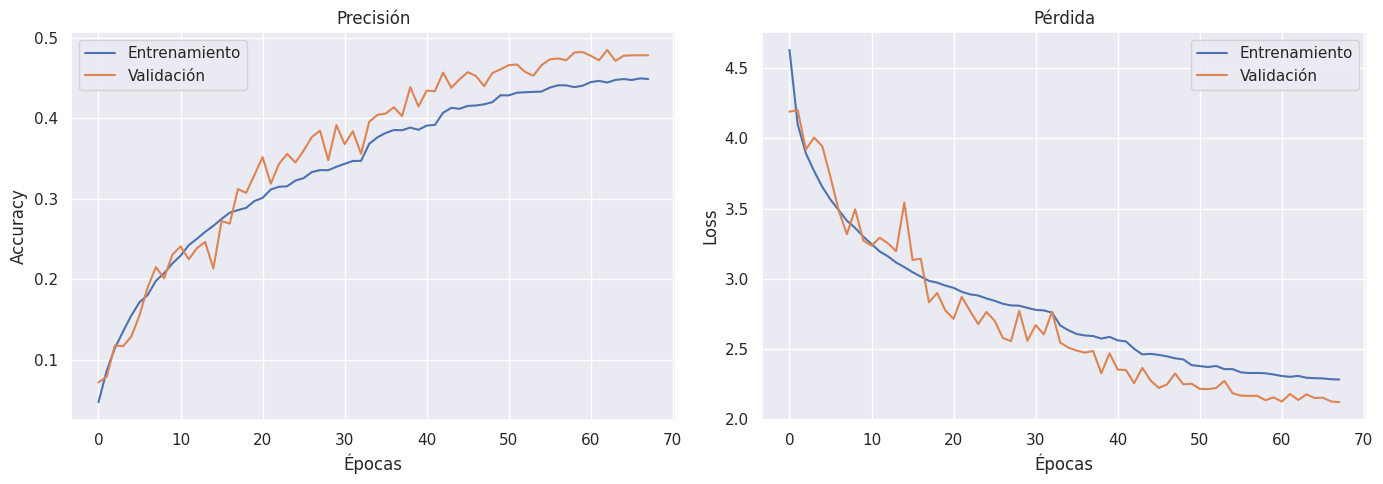

In [51]:
def plot_history(hist):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Entrenamiento')
    plt.plot(hist.history['val_accuracy'], label='Validaci칩n')
    plt.title('Precisi칩n')
    plt.xlabel('칄pocas')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Entrenamiento')
    plt.plot(hist.history['val_loss'], label='Validaci칩n')
    plt.title('P칠rdida')
    plt.xlabel('칄pocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

Se pasar치 a la comprensi칩n de los datos para cargar las superclases [Carga de im치genes y etiquetas de las superclases] [Fase 2] 

## Evaluaci칩n de las redes neuronales para las superclases

Se evalua la calidad final del modelo usando datos totalmente nuevos y no vistos durante el entrenamiento.

In [67]:
test_loss_sc, test_accuracy_sc = model_sc.evaluate(x_test_sc, y_test_cat_sc)
print(f"游댌 Test accuracy: {test_accuracy_sc:.4f}")
print(f"游늴 Test loss: {test_loss_sc:.4f}")

313/313 [==============================] - 10s 31ms/step - loss: 1.4237 - accuracy: 0.6046
游댌 Test accuracy: 0.6046
游늴 Test loss: 1.4237


Se graficaron las curvas de precisi칩n y p칠rdida para el entrenamiento y la validaci칩n del modelo.

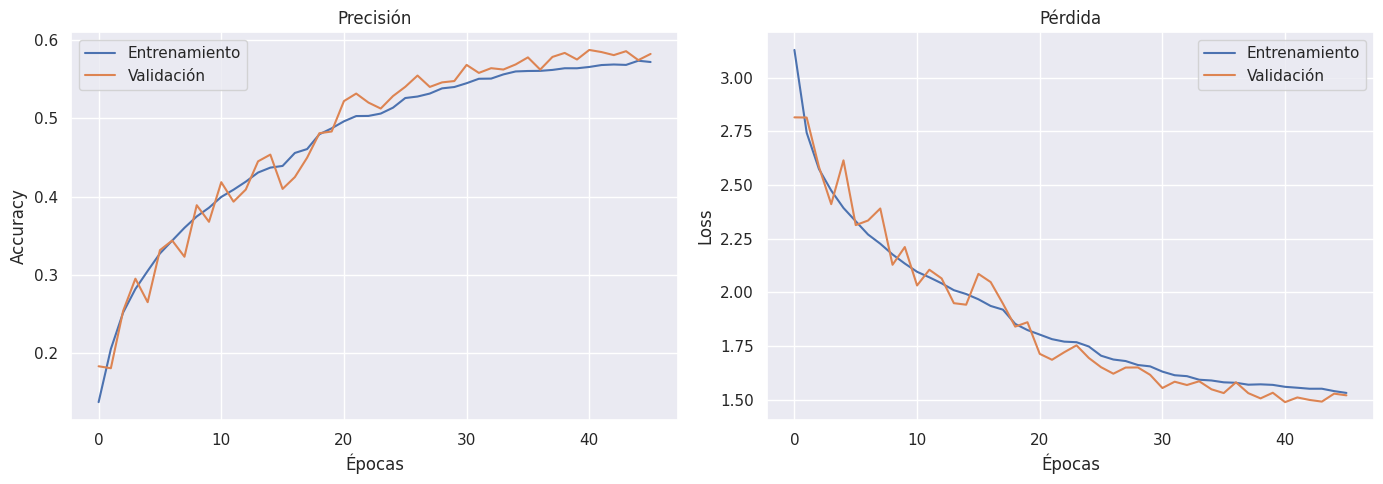

In [70]:
def plot_history_sc(hist_sc):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist_sc.history['accuracy'], label='Entrenamiento')
    plt.plot(hist_sc.history['val_accuracy'], label='Validaci칩n')
    plt.title('Precisi칩n')
    plt.xlabel('칄pocas')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist_sc.history['loss'], label='Entrenamiento')
    plt.plot(hist_sc.history['val_loss'], label='Validaci칩n')
    plt.title('P칠rdida')
    plt.xlabel('칄pocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history_sc(history_sc)

# Fase 6 - Implementaci칩n

En esta fase los modelos ser치n implementados en un entorno productivo para su uso real. Se generar치n reportes detallados sobre los resultados y se establecer치 un plan de mantenimiento y actualizaci칩n peri칩dica para asegurar la continua eficacia del modelo en el tiempo.